In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("/content/credit_customers.csv")


In [3]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [5]:
df.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [6]:
df[['sex', 'marriage']] = df.personal_status.str.split(" ", expand = True)

In [7]:
df.drop('personal_status', axis = 1, inplace = True)

In [8]:
df['class'] = df['class'].map({'bad':0, 'good':1})
df['own_telephone'] = df['own_telephone'].map({'yes':1, 'none':0})
df['foreign_worker'] =df['foreign_worker'].map({'yes':1, 'no':0})

In [9]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,other_parties,residence_since,...,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,sex,marriage
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,none,4.0,...,none,own,2.0,skilled,1.0,1,1,1,male,single
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,none,2.0,...,none,own,1.0,skilled,1.0,0,1,0,female,div/dep/mar
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,none,3.0,...,none,own,1.0,unskilled resident,2.0,0,1,1,male,single
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,guarantor,4.0,...,none,for free,1.0,skilled,2.0,0,1,1,male,single
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,none,4.0,...,none,for free,2.0,skilled,2.0,0,1,0,male,single


In [10]:
for column in df.columns:
  unique_values = df[column].nunique()
  print(f"{column}: {unique_values}")

checking_status: 4
duration: 33
credit_history: 5
purpose: 10
credit_amount: 921
savings_status: 5
employment: 5
installment_commitment: 4
other_parties: 3
residence_since: 4
property_magnitude: 4
age: 53
other_payment_plans: 3
housing: 3
existing_credits: 4
job: 4
num_dependents: 2
own_telephone: 2
foreign_worker: 2
class: 2
sex: 2
marriage: 4


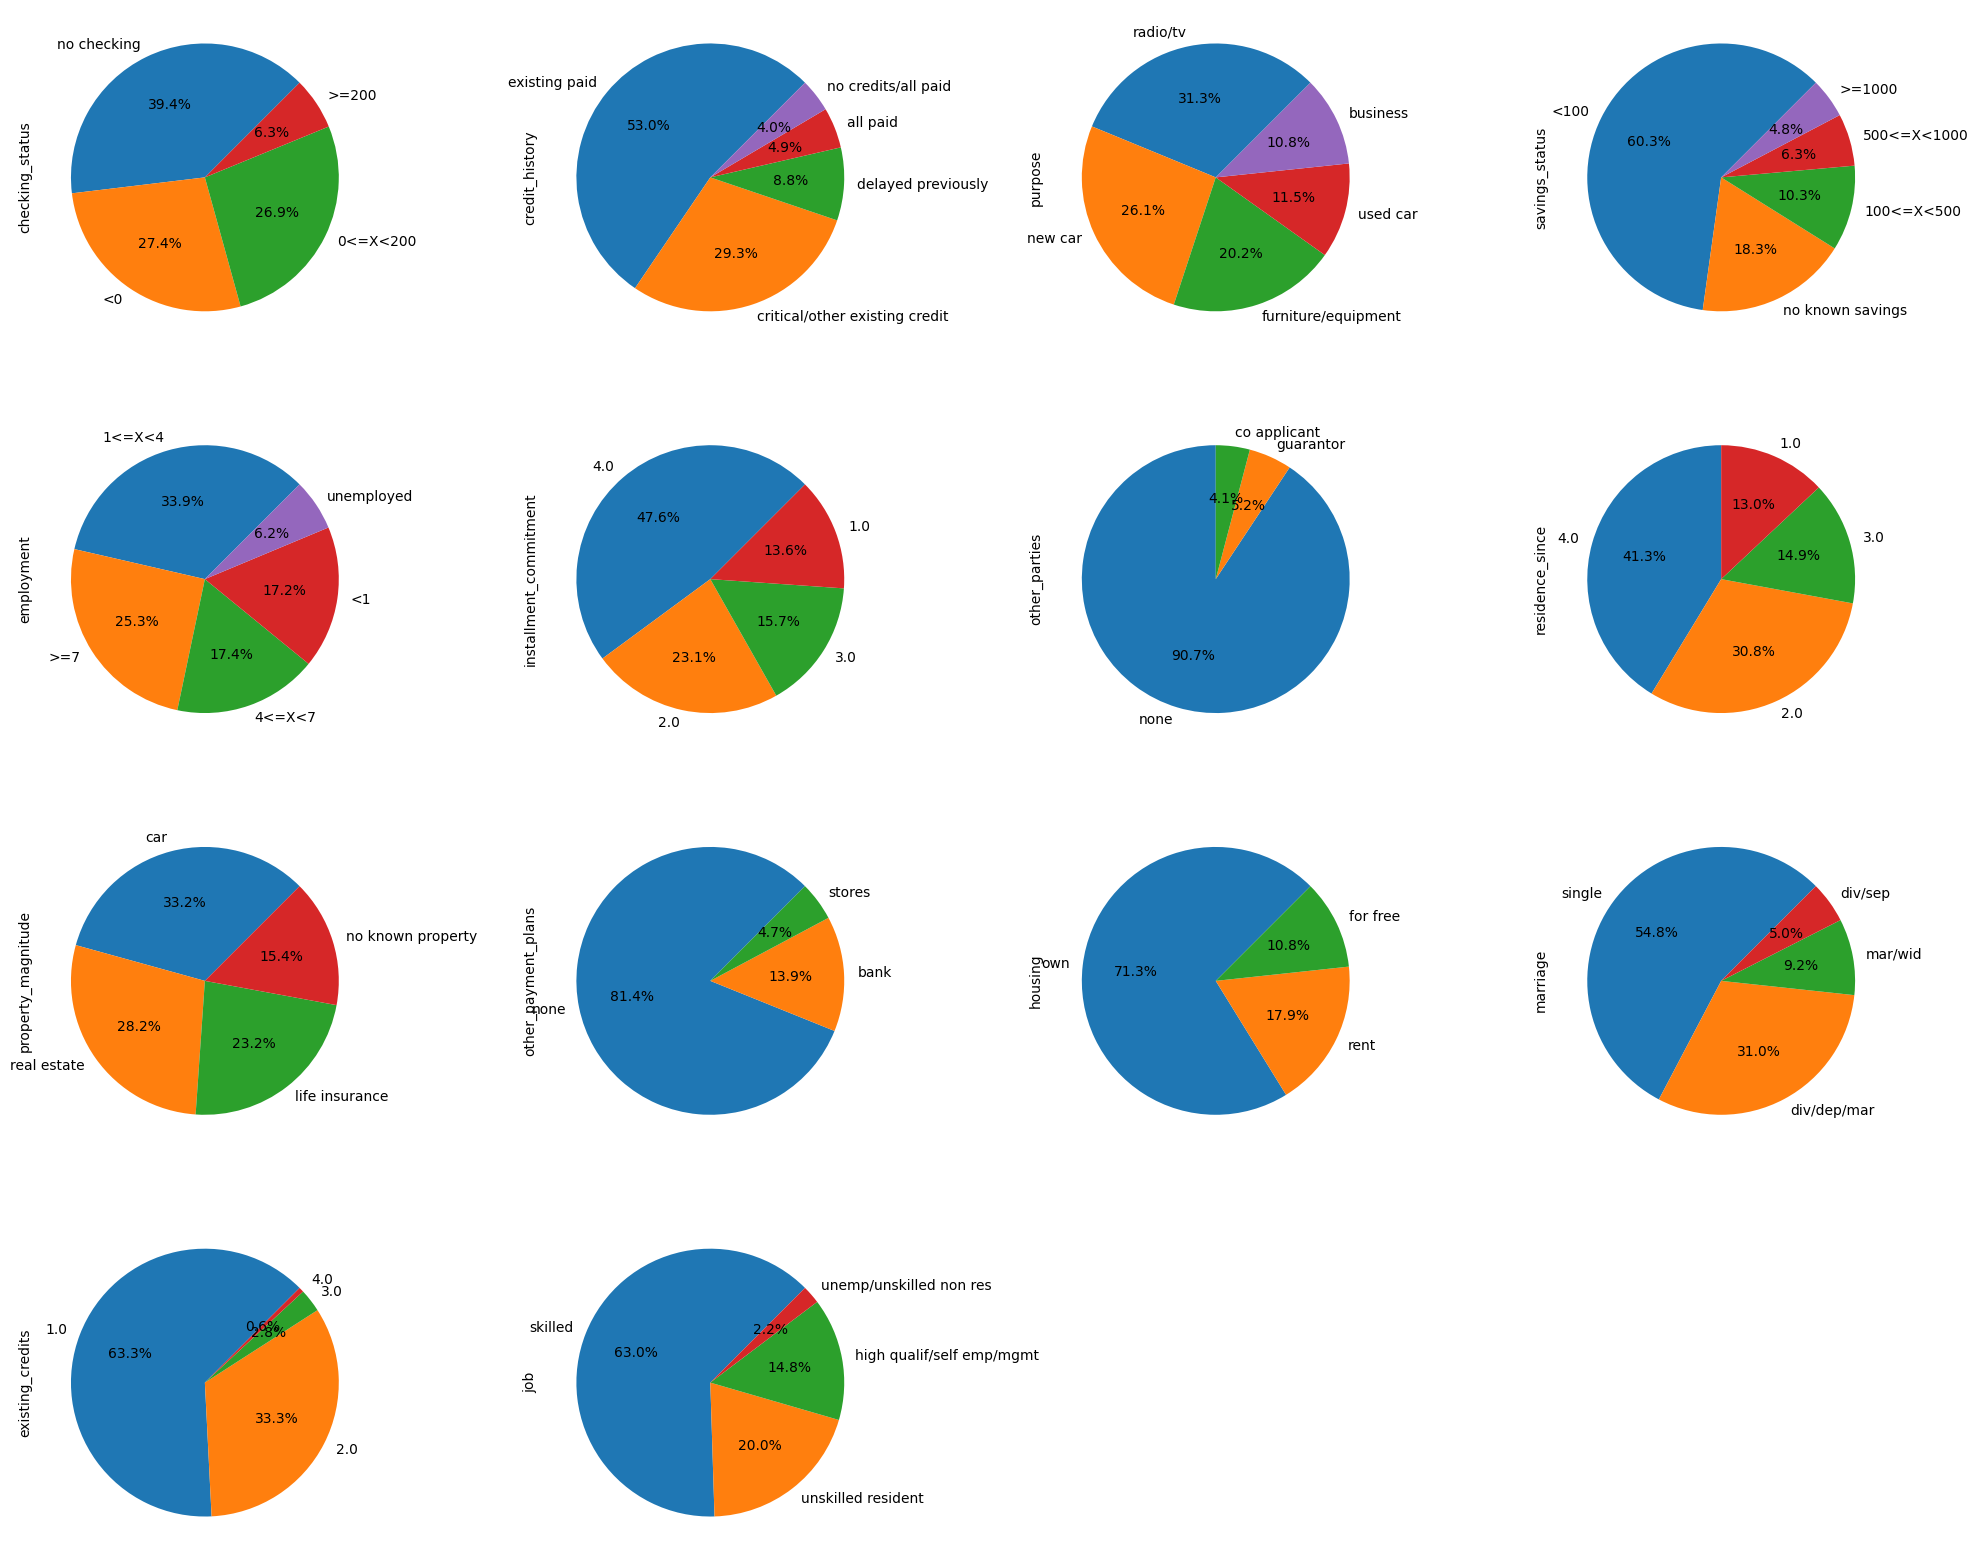

In [11]:
plt.figure(figsize = (25,20))

plt.subplot(4,4, 1)
gender = df['checking_status'].value_counts()
gender.plot(kind = 'pie', autopct = '%1.1f%%', startangle = 45)

plt.subplot(4,4,2)
gender = df['credit_history'].value_counts()
gender.plot(kind = 'pie', autopct = '%1.1f%%', startangle = 45)

plt.subplot(4,4,3)
gender = df['purpose'].value_counts().head()
gender.plot(kind = 'pie', autopct = '%1.1f%%', startangle = 45)

plt.subplot(4,4,4)
gender = df['savings_status'].value_counts()
gender.plot(kind = 'pie', autopct = '%1.1f%%', startangle = 45)

plt.subplot(4,4,5)
gender = df['employment'].value_counts()
gender.plot(kind = 'pie', autopct = '%1.1f%%', startangle = 45)

plt.subplot(4,4,6)
gender = df['installment_commitment'].value_counts()
gender.plot(kind = 'pie', autopct = '%1.1f%%', startangle = 45)

plt.subplot(4,4,7)
gender = df['other_parties'].value_counts()
gender.plot(kind = 'pie', autopct = '%1.1f%%', startangle = 90)

plt.subplot(4,4,8)
gender = df['residence_since'].value_counts()
gender.plot(kind = 'pie', autopct = '%1.1f%%', startangle = 90)

plt.subplot(4,4,9)
gender = df['property_magnitude'].value_counts()
gender.plot(kind = 'pie', autopct = '%1.1f%%', startangle = 45)

plt.subplot(4,4,10)
gender = df['other_payment_plans'].value_counts()
gender.plot(kind = 'pie', autopct = '%1.1f%%', startangle = 45)

plt.subplot(4,4,11)
gender = df['housing'].value_counts()
gender.plot(kind = 'pie', autopct = '%1.1f%%', startangle = 45)

plt.subplot(4,4,12)
gender = df['marriage'].value_counts()
gender.plot(kind = 'pie', autopct = '%1.1f%%', startangle = 45)

plt.subplot(4,4,13)
gender = df['existing_credits'].value_counts()
gender.plot(kind = 'pie', autopct = '%1.1f%%', startangle = 45)

plt.subplot(4,4,14)
gender = df['job'].value_counts()
gender.plot(kind = 'pie', autopct = '%1.1f%%', startangle = 45)

plt.show()

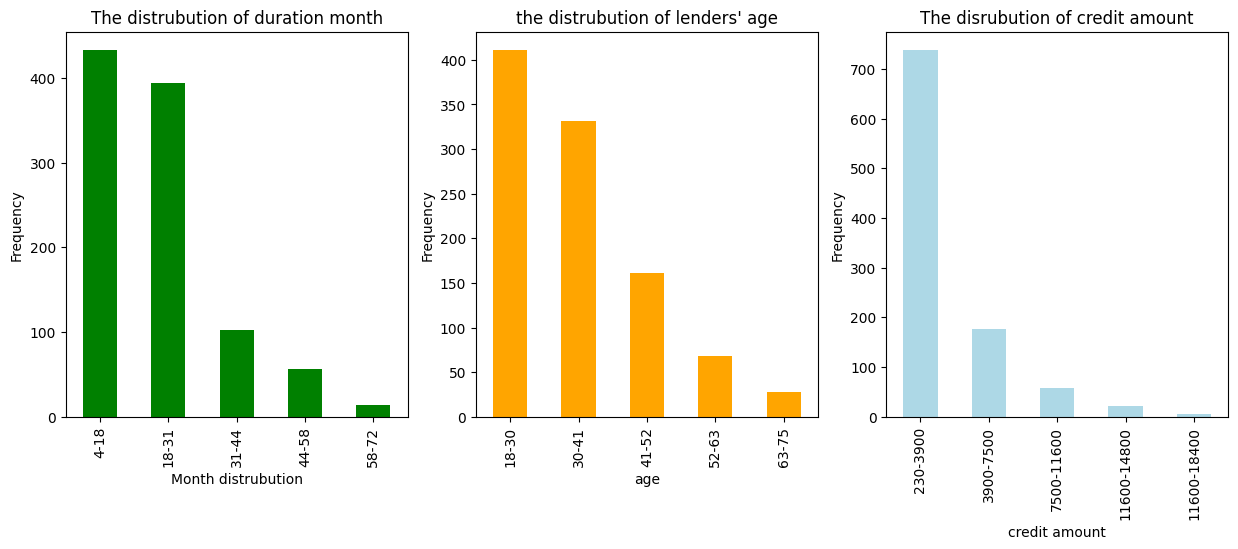

In [12]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
duration_labels = ['4-18', '18-31', '31-44', '44-58', '58-72']
day_cut = pd.cut(df['duration'], 5, labels = duration_labels).value_counts()
day_cut.plot(kind = 'bar', color = 'g')
plt.xlabel('Month distrubution')
plt.ylabel('Frequency')
plt.title('The distrubution of duration month')

plt.subplot(1,3,2)
age_labels = ['18-30', '30-41', '41-52', '52-63', '63-75']
day_cut = pd.cut(df['age'], 5, labels = age_labels).value_counts()
day_cut.plot(kind = 'bar', color = 'orange')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.title("the distrubution of lenders' age")

plt.subplot(1,3,3)
credit_amount_labels = ['230-3900', '3900-7500', '7500-11600', '11600-14800', '11600-18400']
day_cut = pd.cut(df['credit_amount'], 5, labels = credit_amount_labels).value_counts()
day_cut.plot(kind = 'bar', color = 'lightblue')
plt.xlabel('credit amount')
plt.ylabel('Frequency')
plt.title('The disrubution of credit amount')


plt.show()

In [13]:
df.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'other_parties', 'residence_since',
       'property_magnitude', 'age', 'other_payment_plans', 'housing',
       'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class', 'sex', 'marriage'],
      dtype='object')

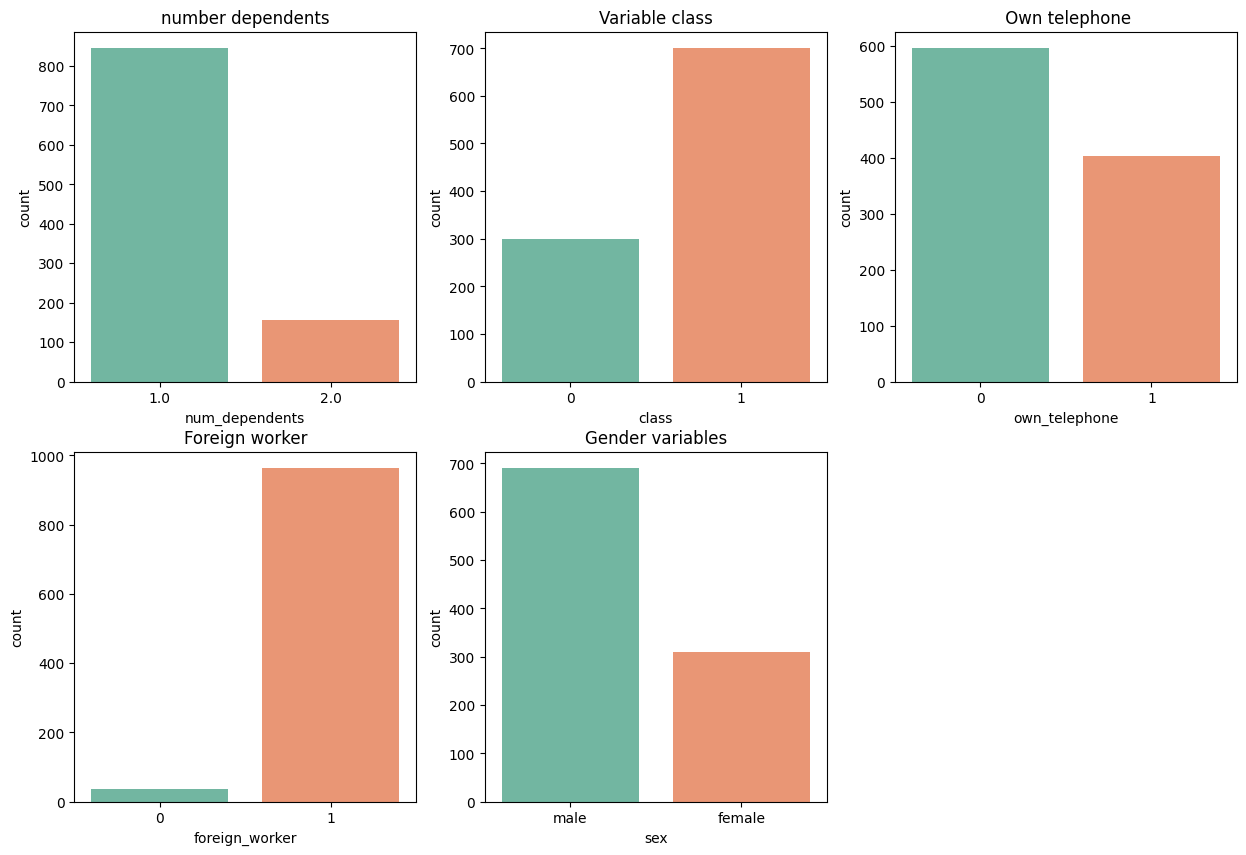

In [14]:
plt.figure(figsize = (15, 10))

plt.subplot(2,3,1)
plt.gca().set_title('number dependents')
sns.countplot(x = 'num_dependents', palette = 'Set2', data = df)

plt.subplot(2,3,2)
plt.gca().set_title('Variable class')
sns.countplot(x = 'class', palette = 'Set2', data = df)

plt.subplot(2,3,3)
plt.gca().set_title(' Own telephone')
sns.countplot(x = 'own_telephone', palette = 'Set2', data = df)

plt.subplot(2,3,4)
plt.gca().set_title('Foreign worker')
sns.countplot(x = 'foreign_worker', palette = 'Set2', data = df)

plt.subplot(2,3,5)
plt.gca().set_title('Gender variables')
sns.countplot(x = 'sex', palette = 'Set2', data = df)
plt.show()